<a href="https://colab.research.google.com/github/ii200400/Tensorflow_Tutorial/blob/master/09%20-%20GAN/01_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요

비감독(Unsupervised) 학습 방법의 뜨거운 감자 GAN 구현

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## 데이터 정의

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

## 모델 구성

### 하이퍼파라미터 설정

In [ ]:
total_epoch = 100
batch_size = 100
learning_rate = 0.0002
# 신경망 레이어 구성 옵션
n_hidden = 256
n_input = 28 * 28
n_noise = 128  # 생성기의 입력값으로 사용할 입력의 크기

### 변수 설정

In [ ]:
# GAN 도 Unsupervised 학습이므로 Autoencoder 처럼 Y 를 사용하지 않는다.
X = tf.placeholder(tf.float32, [None, n_input])
# 입력값으로 사용할 변수를 생성한다.
Z = tf.placeholder(tf.float32, [None, n_noise])

# 생성기 신경망에 사용하는 변수들
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden]))
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

# 판별기 신경망에 사용하는 변수들
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))
# 판별기의 최종 결과값은 얼마나 진짜와 가깝냐를 판단하는 0~1 사이의 스칼라값 하나이다.
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1]))

### 신경망 구성

In [ ]:
# 생성기(G) 신경망 구성
def generator(noise_z):
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2)

    return output

# 판별기(D) 신경망 구성
def discriminator(inputs):
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2)

    return output

### 랜덤 이미지 생성

In [ ]:
# 랜덤한 입력값을 만드는 함수
def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))

### GAN의 기본 구성

두 모델을 각각 생성하고 생성자 모델의 결과물을 감식자 모델이 판별해야하는 구조여서 이전까지 만들었던 모델보다는 복잡한 구성을 가진다.

In [ ]:
# 랜덤한 이미지를 생성
G = generator(Z)
# 생성자가 만든 이미지를 감식자에게 판별하도록 한다.
D_gene = discriminator(G)
# 진짜 이미지를 감식자에게 판별하도록 한다.
D_real = discriminator(X)

### 손실 함수

In [ ]:
# 감식자의 손실값은 진짜와 가짜 이미지를 잘 구별할 수록 증가한다.
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_gene))
# 논문에서는 loss_D 와 같은 수식으로 최소화 하는 생성기를 찾지만,
# 이 코드에서는 다음과 같이 사용하였다. (결국 의미는 같으므로 학습이 되긴한다.)
# 감식자와 반대로 생성자의 손실값은 감식자가 가짜 이미지를 잘 못 구분할수록 증가한다.
loss_G = tf.reduce_mean(tf.log(D_gene))

### 최적화 함수

In [ ]:
# loss_D와 loss_G는 서로 독립적인 변수를 사용하여 최적화를 한다.
D_var_list = [D_W1, D_b1, D_W2, D_b2]
G_var_list = [G_W1, G_b1, G_W2, G_b2]

# minimize를 최적화에 사용하기 위해서는 loss_D 와 loss_G 에 음수 부호를 붙여주어야 한다.
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D, var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G, var_list=G_var_list)

### 모델 학습 및 테스트

Epoch: 0000 D loss: -0.4401 G loss: -2.14
Epoch: 0001 D loss: -0.2483 G loss: -2.438
Epoch: 0002 D loss: -0.155 G loss: -3.003
Epoch: 0003 D loss: -0.4836 G loss: -1.432
Epoch: 0004 D loss: -0.2971 G loss: -2.368
Epoch: 0005 D loss: -0.2603 G loss: -2.679
Epoch: 0006 D loss: -0.2068 G loss: -3.317
Epoch: 0007 D loss: -0.3063 G loss: -2.681
Epoch: 0008 D loss: -0.3326 G loss: -2.639
Epoch: 0009 D loss: -0.2996 G loss: -2.597
Epoch: 0010 D loss: -0.1681 G loss: -3.069
Epoch: 0011 D loss: -0.2237 G loss: -3.524
Epoch: 0012 D loss: -0.4122 G loss: -2.592
Epoch: 0013 D loss: -0.4116 G loss: -2.616
Epoch: 0014 D loss: -0.2455 G loss: -2.662
Epoch: 0015 D loss: -0.3026 G loss: -2.659
Epoch: 0016 D loss: -0.4225 G loss: -2.529
Epoch: 0017 D loss: -0.3392 G loss: -2.953
Epoch: 0018 D loss: -0.3421 G loss: -2.763
Epoch: 0019 D loss: -0.4831 G loss: -2.145
Epoch: 0020 D loss: -0.5108 G loss: -2.062
Epoch: 0021 D loss: -0.4293 G loss: -2.515
Epoch: 0022 D loss: -0.3989 G loss: -2.821
Epoch: 0023 D

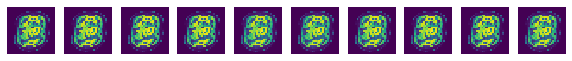

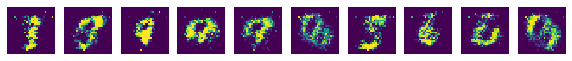

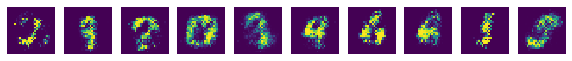

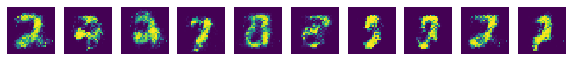

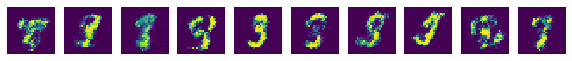

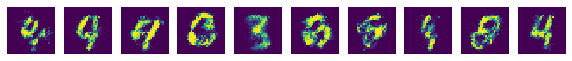

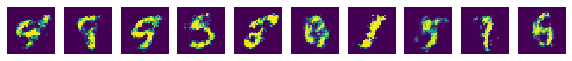

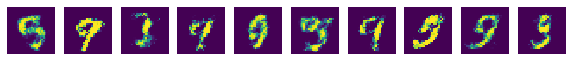

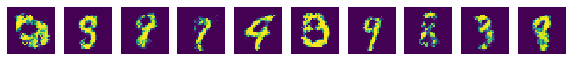

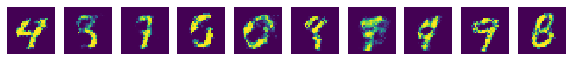

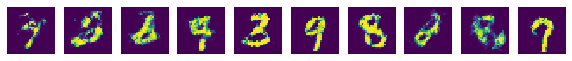

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)

        # 판별기와 생성기 신경망을 각각 학습시킨다.
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Z: noise})

    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G))

    # 학습이 되어가는 모습을 보기 위해 주기적으로 이미지를 생성하여 저장한다.
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z: noise})

        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

        for i in range(sample_size):
            ax[i].set_axis_off()
            ax[i].imshow(np.reshape(samples[i], (28, 28)))

        # 이미지를 저장하는 코드이다.
        # plt.savefig('samples/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        # plt.close(fig)

## 전체 코드

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0000 D loss: -0.6811 G loss: -1.842
Epoch: 0001 D loss: -0.3858 G loss: -2.169
Epoch: 0002 D loss: -0.4147 G loss: -1.958
Epoch: 0003 D loss: -0.6715 G loss: -1.266
Epoch: 0004 D loss: -0.8245 G loss: -1.502
Epoch: 0005 D loss: -0.3341 G loss: -2.237
Epoch: 0006 D loss: -0.2534 G loss: -2.482
Epoch: 0007 D loss: -0.1712 G loss: -3.31
Epoch: 0008 D loss: -0.1696 G loss: -3.328
Epoch: 0009 D loss: -0.1472 G loss: -3.59
Epoch: 0010 D loss: -0.2596 G loss: -2.798
Epoch: 0011 D loss: -0.2978 G loss: -2.487
Epoch: 0012 D loss: -0.3444 G loss: -2.349
Epoch: 0013 D loss: -0.3889 G loss: -2.395
Epoch: 0014 D loss: -0.46 G loss: -2.245
Epoch: 0015 D loss: -0.6639 G loss: -2.123
Epoch: 0016 D loss: -0.4434 G loss: -2.216
Epoch: 0017 D loss: -0.5231 G loss: -2.491
Epoch: 0018 D loss: -0.4041 

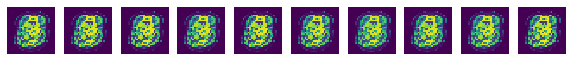

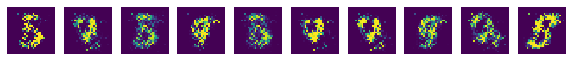

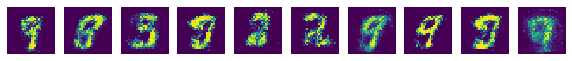

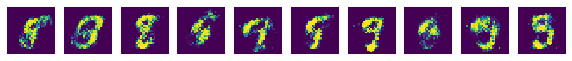

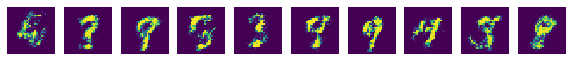

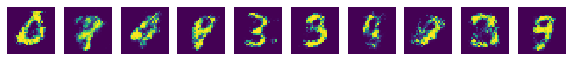

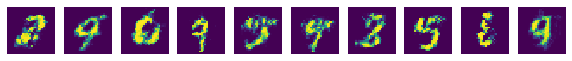

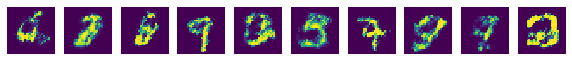

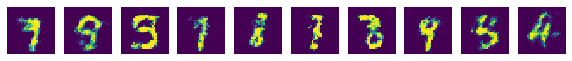

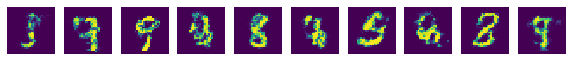

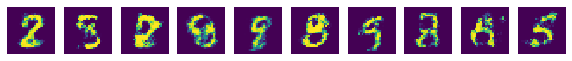

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

#########
# 옵션 설정
######

total_epoch = 100
batch_size = 100
learning_rate = 0.0002

# 신경망 레이어 구성 옵션
n_hidden = 256
n_input = 28 * 28
n_noise = 128  

#########
# 신경망 모델 구성
######

X = tf.placeholder(tf.float32, [None, n_input])
Z = tf.placeholder(tf.float32, [None, n_noise])

# 생성기 신경망 변수
G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden]))
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01))
G_b2 = tf.Variable(tf.zeros([n_input]))

# 판별기 신경망 변수
D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01))
D_b2 = tf.Variable(tf.zeros([1]))


# 생성기(G) 신경망
def generator(noise_z):
    hidden = tf.nn.relu(
                    tf.matmul(noise_z, G_W1) + G_b1)
    output = tf.nn.sigmoid(
                    tf.matmul(hidden, G_W2) + G_b2)

    return output

# 판별기(D) 신경망
def discriminator(inputs):
    hidden = tf.nn.relu(
                    tf.matmul(inputs, D_W1) + D_b1)
    output = tf.nn.sigmoid(
                    tf.matmul(hidden, D_W2) + D_b2)

    return output

# 랜덤 입력값 생성 함수
def get_noise(batch_size, n_noise):
    return np.random.normal(size=(batch_size, n_noise))


G = generator(Z)
D_gene = discriminator(G)
D_real = discriminator(X)

# 손실 계산
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_gene))
loss_G = tf.reduce_mean(tf.log(D_gene))

D_var_list = [D_W1, D_b1, D_W2, D_b2]
G_var_list = [G_W1, G_b1, G_W2, G_b2]

# 최적화 설정
train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D, var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G, var_list=G_var_list)

#########
# 신경망 모델 학습
######

sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)

        _, loss_val_D = sess.run([train_D, loss_D],
                                 feed_dict={X: batch_xs, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G],
                                 feed_dict={Z: noise})

    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G))

    #########
    # 학습이 되어가는 모습을 보기 위해 주기적으로 이미지를 생성하여 저장
    ######

    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G, feed_dict={Z: noise})

        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1))

        for i in range(sample_size):
            ax[i].set_axis_off()
            ax[i].imshow(np.reshape(samples[i], (28, 28)))

        # plt.savefig('samples/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        # plt.close(fig)
